In [6]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as od
from sklearn.model_selection import train_test_split
titanic=sns.load_dataset("titanic")
titanic.head()
titanic.info()
titanic.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
features=["pclass","sex","fare","embarked","age"]
target=['survived']

In [8]:
#imputer ---to fill the missing data
from sklearn.impute import SimpleImputer
imp_median=SimpleImputer(strategy="median")
titanic[["age"]]=imp_median.fit_transform(titanic[['age']])

imp_freq=SimpleImputer(strategy="most_frequent")
titanic[["embarked"]]=imp_freq.fit_transform(titanic[["embarked"]])
titanic.head()
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
titanic['sex']=le.fit_transform(titanic['sex'])
titanic['embarked']=le.fit_transform(titanic['embarked'])
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,1,22.0,1,0,7.2500,2,Third,man,True,NaN,Southampton,no,False
1,1,1,0,38.0,1,0,71.2833,0,First,woman,False,C,Cherbourg,yes,False
2,1,3,0,26.0,0,0,7.9250,2,Third,woman,False,NaN,Southampton,yes,True
3,1,1,0,35.0,1,0,53.1000,2,First,woman,False,C,Southampton,yes,False
4,0,3,1,35.0,0,0,8.0500,2,Third,man,True,NaN,Southampton,no,True


In [10]:
x=titanic[features]
y=titanic[target]
y.head()

,survived
0,0
1,1
2,1
3,1
4,0


In [11]:
x_train,x_test,y_train,y_test=train_test_split(
    x,y,test_size=0.2,random_state=42
)
x_train.head()

,pclass,sex,fare,embarked,age
331,1,1,28.5000,2,45.5
733,2,1,13.0000,2,23.0
382,3,1,7.9250,2,32.0
704,3,1,7.8542,2,26.0
813,3,0,31.2750,2,6.0


In [13]:
#decision tree model-no pruning
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [14]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.770949720670391


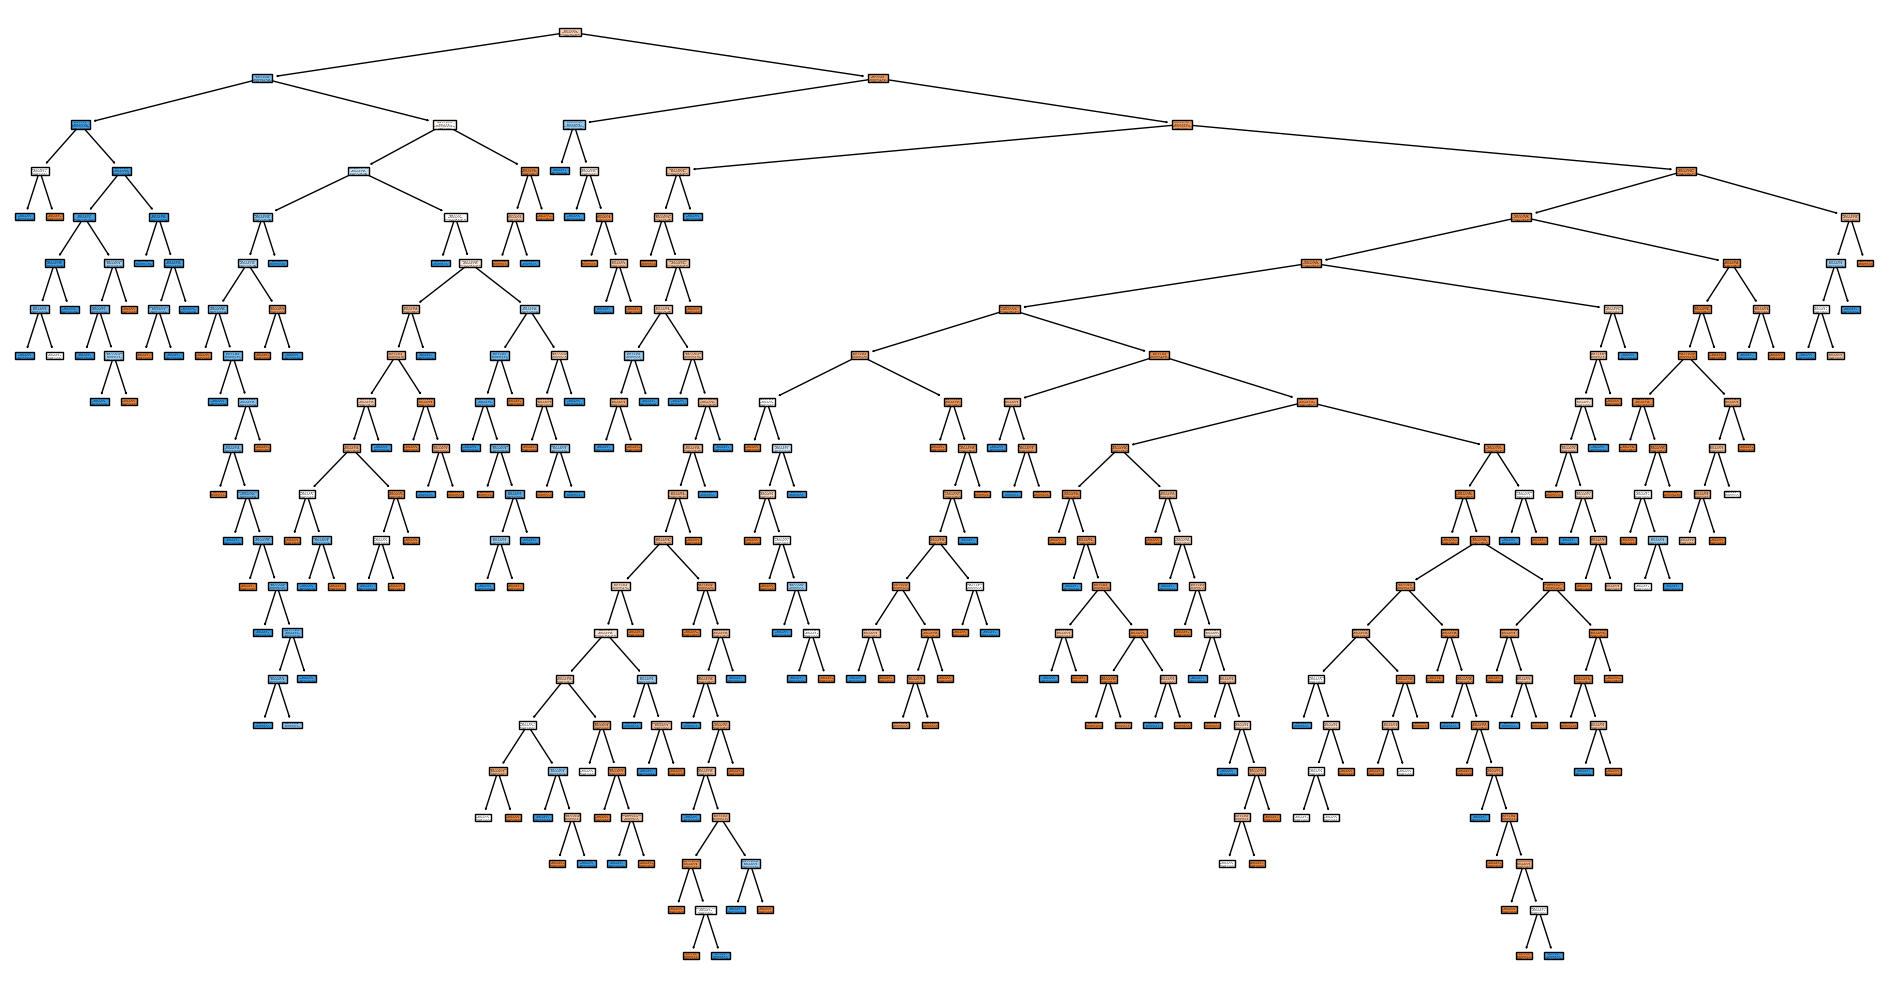

In [25]:
from sklearn.tree import plot_tree
plt.figure(figsize=(19,10))
plot_tree(model,
          feature_names=x.columns,
          class_names=['died','survived'],
          filled=True)
        # max_depth=3)
plt.tight_layout()
plt.show()  